# Проект: Исследование объявлений о продаже квартир

## Данные

В наличии были следующие данные:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Задача


Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.

## Используемые библиотеки

pandas

In [2]:
import pandas as pd

In [5]:
import os
path = '/datasets/real_estate_data.csv'
if not os.path.exists(path):
    path = 'DataFrames/real_estate_data.csv'
    
data = pd.read_csv(path, sep='\t')

In [2]:
display(data.head()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

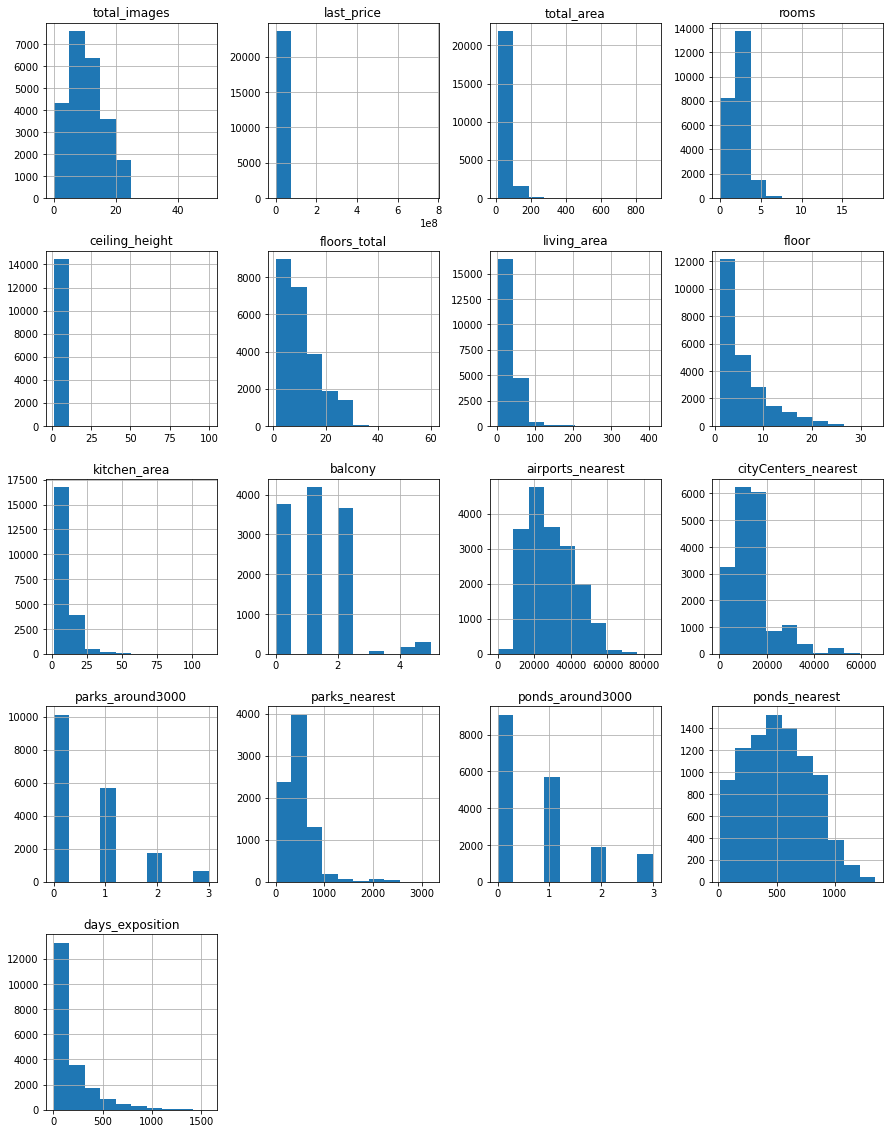

In [3]:
data.hist(figsize=(15, 20)) # Проверка на неадекватные значения
;

### Предобработка данных

In [4]:
data.isna().sum() #подсчет пропусков
#  pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data['balcony'] = data['balcony'].fillna(0)# если количество балконов не указано, скорее всего их нет
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)# если количество водоемов в радиусе 3 км не указано, скорее всего их нет
data['parks_around3000'] = data['parks_around3000'].fillna(0)# если количество парков в радиусе 3 км не указано, скорее всего их нет
data['is_apartment'] = data['is_apartment'].fillna(False)# если не указано, скорее всего это не апартаменты

data.loc[(data['kitchen_area'].isna() & data['studio']==True), 'kitchen_area']=0 # у студий нет кухни, поэтому пропуски можно заменить на 0
data.loc[(data['living_area'].isna() & data['studio']==True), 'living_area']=data['total_area'] # у студии жилая площадь примерно равна всей площади

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1893
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2129
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Причины появления пропусков:** человеческий фактор (ошибка при вводе данных, скрытие информации, невнимательность), технический фактор (выход из строя технического оборудования).

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23695 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23695 non-null  int64         
 1   last_price              23695 non-null  float64       
 2   total_area              23695 non-null  float64       
 3   first_day_exposition    23695 non-null  datetime64[ns]
 4   rooms                   23695 non-null  int64         
 5   ceiling_height          14500 non-null  float64       
 6   floors_total            23695 non-null  Int64         
 7   living_area             23695 non-null  float64       
 8   floor                   23695 non-null  int64         
 9   is_apartment            23695 non-null  bool          
 10  studio                  23695 non-null  bool          
 11  open_plan               23695 non-null  bool          
 12  kitchen_area            21566 non-null  float6

In [8]:
data['balcony'] = data['balcony'].astype('Int64')
data['floors_total'] = data['floors_total'].astype('Int64')
data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64')

Количество дней, этажей и балконов не может быть не целой величиной.

In [9]:
data.duplicated().sum()

0

<div class="alert alert-info"> <b>Явные дубликаты отсутсвуют</b></div>


In [10]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [11]:
# избавление от неявных дубликатов
data['locality_name'] = data['locality_name'].fillna("") 
wrong_names = ['поселок городского типа', 'посёлок городского типа', 'городской поселок', 'городской посёлок', 'поселок']
correct_name = 'посёлок'
def replace_wrong_names(name):
    for wrong_name in wrong_names:
         if wrong_name in name:
            return name.replace(wrong_name, correct_name)
    return name
 
data['locality_name'] = data['locality_name'].apply(replace_wrong_names)

display(data['locality_name'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [12]:
display(data['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [13]:
print(len(data[data['ceiling_height'] == 100.0]))

1


In [14]:
print(len(data[data['ceiling_height'] == 1.0]))

1


In [15]:
print(len(data[data['ceiling_height'] < 2.0]))
print(data.loc[data['ceiling_height'] < 2.0, ['ceiling_height']])

3
       ceiling_height
5712             1.20
16934            1.75
22590            1.00


In [16]:
data = data.drop(data[data['ceiling_height'] == 100].index) 
data = data.drop(data[data['ceiling_height'] == 1].index)
data = data.drop(data[data['ceiling_height'] == 1.2].index)
data = data.drop(data[data['ceiling_height'] == 14].index)# выбросы, который можно удалить

In [17]:
display(data['ceiling_height'].describe())

count    14500.000000
mean         2.764250
std          0.964139
min          1.750000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

In [18]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] <= 19, data['ceiling_height']*0.1) #Логично предположить, что на самом деле 25 м это 2.5 м.

In [19]:
display(data['ceiling_height'].describe())

count    14500.000000
mean         2.728554
std          0.299261
min          1.750000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

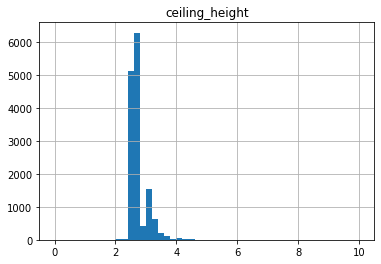

In [20]:
data.hist('ceiling_height', bins=50, range=(0,10))

In [21]:
display(data['living_area'].describe())

count    21802.000000
mean        34.455424
std         22.027812
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [22]:
display(data.loc[data['total_area'] < data['living_area']])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [23]:
display(data.loc[data['total_area'] < data['kitchen_area']])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [24]:
display(data.loc[data['living_area'] < 6])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17,3.0,17,False,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.0,2,False,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
17582,11,2680000.0,22.0,2018-08-11,0,NaN,25,5.0,8,False,...,0.0,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01,0,NaN,24,2.0,22,False,...,0.0,0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,66.0
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9,5.4,1,False,...,9.8,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
23574,14,64990000.0,139.0,2015-11-24,3,3.0,8,3.0,8,False,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


In [25]:
data['living_area'] = data['living_area'].where(data['living_area'] > 10, data['total_area'] - data['kitchen_area']) # аномально маленькие живые площади можно заменить приблизительными 
display(data['living_area'].describe())

count    22228.000000
mean        34.953125
std         23.101873
min         10.080000
25%         18.900000
50%         30.100000
75%         42.800000
max        571.000000
Name: living_area, dtype: float64

In [26]:
display(data['kitchen_area'].describe())

count    21566.000000
mean        10.497104
std          5.950200
min          0.000000
25%          7.000000
50%          9.005000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [27]:
display(data.loc[(data['kitchen_area'] < 4) & (data['kitchen_area'] != 0), ['kitchen_area', 'total_area']])

,kitchen_area,total_area
906,2.00,27.00
2165,3.00,25.00
3078,3.20,43.00
3195,3.80,25.60
6084,3.00,18.00
6262,2.00,24.00
7047,3.80,21.00
7950,2.89,66.40
8712,3.70,42.70
8729,2.40,18.40


В данных встречаются аномально большие значения для высоты потолков, а также аномально маленькие значения жилой площади и площади кухни для некоторых квартир.

In [28]:
data['living_area'] = data['living_area'].where(data['total_area'] > data['living_area'], data['total_area'])

### Посчитайте и добавьте в таблицу новые столбцы

In [29]:
data['price_per_meter'] = data['last_price']/data['total_area']

In [30]:
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_day_exposition'] = data['first_day_exposition'].dt.month
data['year_day_exposition'] = data['first_day_exposition'].dt.year
#astype('datetime64[M]')

In [31]:
data['floor'] = data['floor'].fillna(0) # Индикатор, если неизвестен этаж квартиры
data['floors_total'] = data['floors_total'].fillna(-1) # Индикатор для неизвестного количества этажей в доме

In [32]:
def first_and_last_floor(row):
    if row['floor'] == row['floors_total']:
        return 'Последний'
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == 0:
        return 'Неизвестен'
    return 'Другой'

data['category_by_floor'] = data.apply(first_and_last_floor, axis=1)

In [33]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

### Проведите исследовательский анализ данных

In [34]:
display(data['total_area'].describe())

count    23695.000000
mean        60.351276
std         35.656144
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

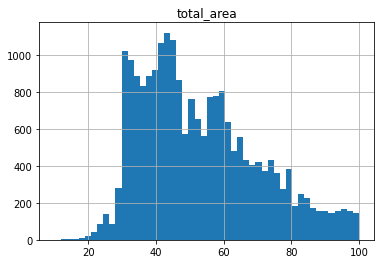

In [35]:
data.hist('total_area', bins=50, range=(10,100))

Больше всего квартир с площадью около 30, 45 и 60 кв. м. Редко встречаются меньше 20 и больше 200 кв. метров. Распределение близко к нормальному. Данные выглядят правдоподобно.

count    23695.000000
mean        36.573881
std         25.467363
min         10.080000
25%         19.000000
50%         31.000000
75%         44.000000
max        571.000000
Name: living_area, dtype: float64

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

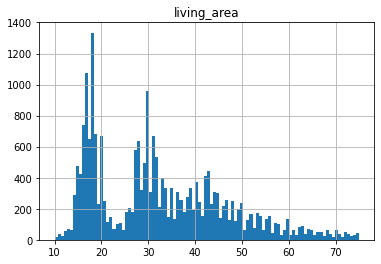

In [36]:
display(data['living_area'].describe())
data.hist('living_area', bins=100, range=(10,75))

Слишком много жилых площадей меньше 20 кв. метров. Возможно, многие клиенты не знают, что входит в жилую площадь, из-за чего данные выглядят неправдоподобно.

count    21566.000000
mean        10.497104
std          5.950200
min          0.000000
25%          7.000000
50%          9.005000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

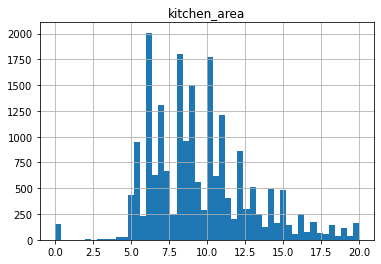

In [37]:
display(data['kitchen_area'].describe())
data.hist('kitchen_area', bins=50, range=(0,20))

Нулевая площадь кухни характерна для квартир студий. Чаще всего встречаются квартиры с площадью кухни около 6, 8 и 11 кв. метров, что выглядит правдоподобно.

count    23695.000000
mean         2.070690
std          1.078473
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

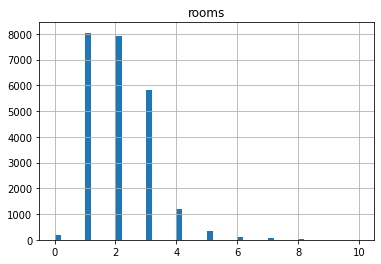

In [38]:
display(data['rooms'].describe())
data.hist('rooms', bins=50, range=(0,10))

Самые популярные квартиры - однокомнатные и двухкомнатные. Данные реалистичные.

count    14500.000000
mean         2.728554
std          0.299261
min          1.750000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

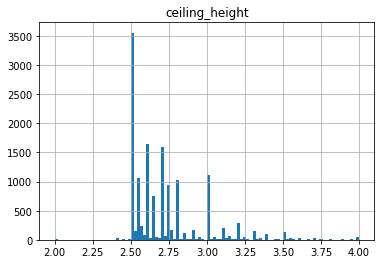

In [39]:
display(data['ceiling_height'].describe())
data.hist('ceiling_height', bins=100, range=(2,4))

Высота потолков от 2,5 до 2,8 и 3 метра являются стандартом и в данных встречаются чаще всего. Хотя встречаются и слишком высокие потолки (10 метром), но таких данных мало.

count    23695.000000
mean         5.892593
std          4.885546
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

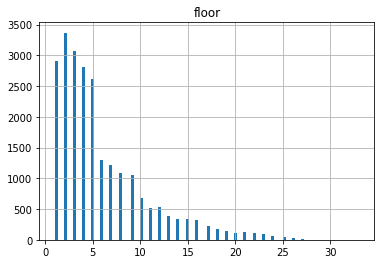

In [40]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
display(data['floor'].describe())
data.hist('floor', bins=100)

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

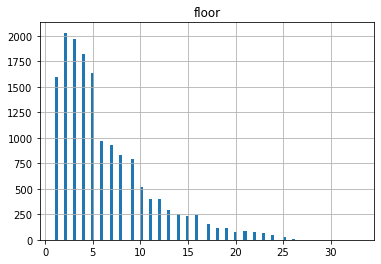

In [41]:
data_spb.hist('floor', bins=100)

Самые популярные этажи - до 5 включительно.

count      23695
unique         3
top       Другой
freq       17444
Name: category_by_floor, dtype: object

<AxesSubplot:>

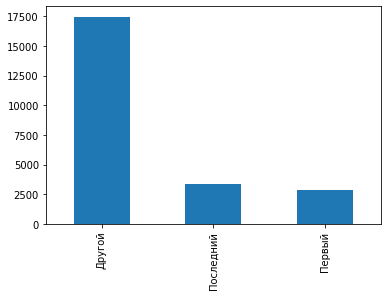

In [42]:
display(data['category_by_floor'].describe())
data['category_by_floor'].value_counts().plot(kind='bar')

Наиболее предпочтительный вариант - не первый и не последний этаж.

count    23695.000000
mean        10.631863
std          6.622678
min         -1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

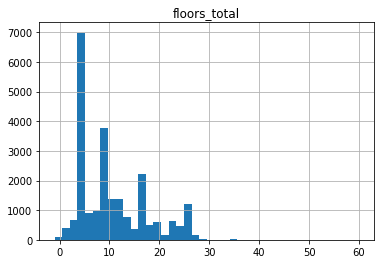

In [43]:
display(data['floors_total'].describe())
data.hist('floors_total', bins=40)

count    23695.000000
mean        10.631863
std          6.622678
min         -1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

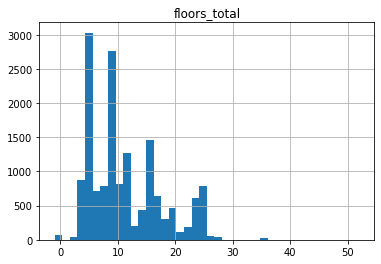

In [44]:
display(data['floors_total'].describe())
data_spb.hist('floors_total', bins=40)

Чаще всего выбирают пятиэтажки и девятиэтажки.

count    18177.000000
mean     14191.633438
std       8608.983969
min        181.000000
25%       9238.000000
50%      13098.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

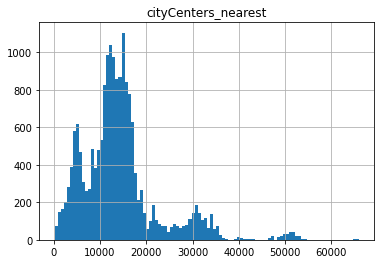

In [45]:
display(data['cityCenters_nearest'].describe())
data.hist('cityCenters_nearest', bins=100)

Больше всего проданных квартир на расстоянии в 10000-20000 км от центра.

count    15657.000000
mean     11601.208150
std       4842.354817
min        181.000000
25%       8328.000000
50%      12244.000000
75%      14943.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

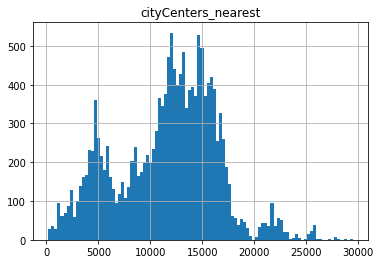

In [46]:
display(data_spb['cityCenters_nearest'].describe())
data_spb.hist('cityCenters_nearest', bins=100)

count    18154.000000
mean     28793.867798
std      12631.375585
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37274.500000
max      84869.000000
Name: airports_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

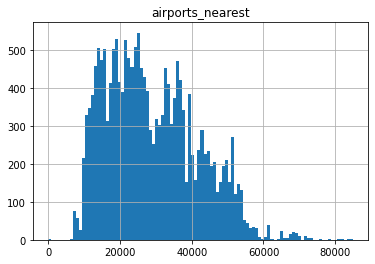

In [47]:
display(data['airports_nearest'].describe())
data.hist('airports_nearest', bins=100)

Больше всего проданных квартир на расстоянии в 10000-40000 км от аэропорта.

count    8077.000000
mean      490.862201
std       342.340329
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

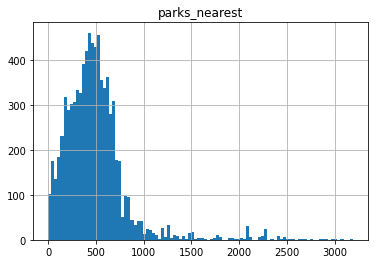

In [48]:
display(data['parks_nearest'].describe())
data.hist('parks_nearest', bins=100)

Больше всего проданных квартир на расстоянии не более 1000 км от ближайшего парка.

count    23695.000000
mean         2.569403
std          1.789124
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_day_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'week_day_exposition'}>]],
      dtype=object)

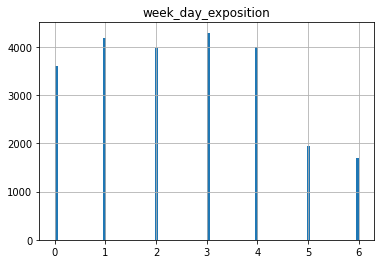

In [49]:
display(data['week_day_exposition'].describe())
data.hist('week_day_exposition', bins=100)

Обычно покупки происходят в будние

count    23695.000000
mean         6.399916
std          3.491748
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_day_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'month_day_exposition'}>]],
      dtype=object)

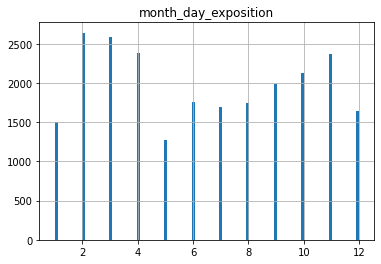

In [50]:
display(data['month_day_exposition'].describe())
data.hist('month_day_exposition', bins=100)

Чаще всего покупка недживимости происходит в феврале, марте, апреле,октябре и ноябре.

In [51]:
print(data['days_exposition'].max())

1580.0


count    20514.000000
mean       180.894901
std        219.740882
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

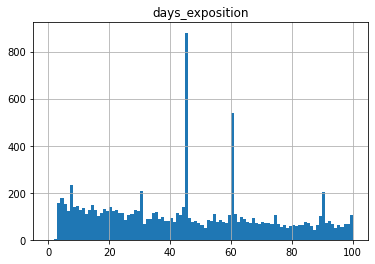

In [52]:
display(data['days_exposition'].describe())
data.hist('days_exposition', bins=100, range=(0,100))

Максимальные значения соотвествуют 43 и 60 дням.

In [53]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

180.89490104319
95.0


Обычно продажа занимает 95 дней. Необычно долгие продажи занимают более 513 дней (выходят за пределы 1,5 IQR), быстрые продажи занимают менее 45 дней.

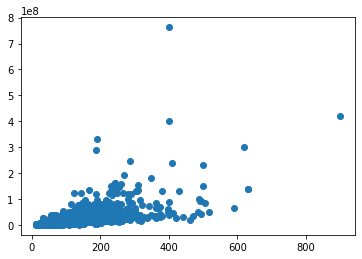

In [54]:
import matplotlib.pyplot as plt
y = data['last_price']
x = data['total_area']
#plt.xlim(1.5, 3.5)
plt.plot(x, y, 'o')
plt.show()

In [55]:
data['last_price'].corr(data['total_area'])

0.6537260264175776

При увеличении площади цена растет. 

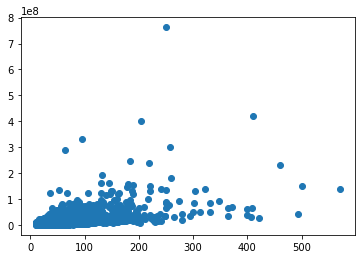

0.5608614809452729

In [56]:
import matplotlib.pyplot as plt
y = data['last_price']
x = data['living_area']
#plt.xlim(1.5, 3.5)
plt.plot(x, y, 'o')
plt.show()

data['last_price'].corr(data['living_area'])

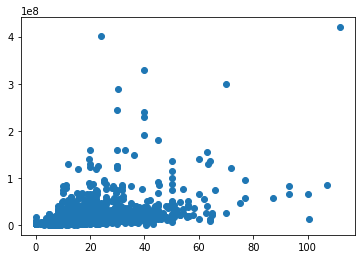

0.5182998299099466

In [57]:
import matplotlib.pyplot as plt
y = data['last_price']
x = data['kitchen_area']
#plt.xlim(1.5, 3.5)
plt.plot(x, y, 'o')
plt.show()

data['last_price'].corr(data['kitchen_area'])

С увеличением жилой площади и площади кухни цена растет.

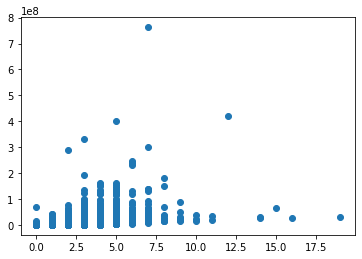

In [58]:
y = data['last_price']
x = data['rooms']
#plt.xlim(1.5, 3.5)
plt.plot(x, y, 'o')
plt.show()

Самые дорогие квартиры - пятикомнатные.

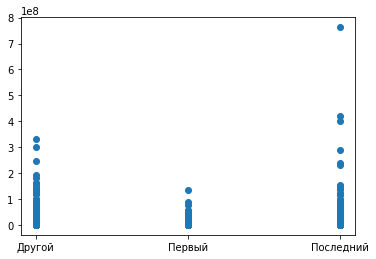

In [59]:
y = data['last_price']
x = data['category_by_floor']
#plt.xlim(1.5, 3.5)
plt.plot(x, y, 'o')
plt.show()

<AxesSubplot:xlabel='category_by_floor'>

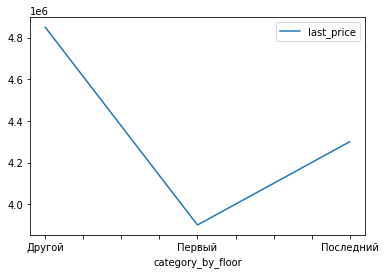

In [60]:
data.pivot_table(index='category_by_floor', values='last_price', aggfunc='median').plot()

Наиболее дешевыми оказываются квартиры, расположенные на 1 этаже. Цена растет, если этаж меняется на последний, но наибольшую цену имеют квартиры, расположенные не на первом и не на последнем этажах.

<AxesSubplot:title={'center':'Зависимость цены от дня недели продажи объекта'}, xlabel='week_day_exposition'>

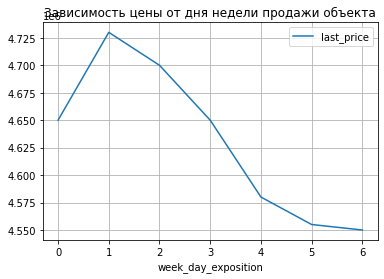

In [61]:
data.pivot_table(index='week_day_exposition', values='last_price', aggfunc='median').plot(grid = True, title = 'Зависимость цены от дня недели продажи объекта')

<AxesSubplot:title={'center':'Зависимость цены от месяца продажи объекта'}, xlabel='month_day_exposition'>

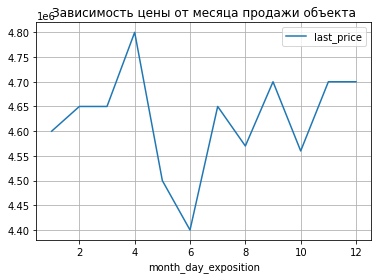

In [62]:
data.pivot_table(index='month_day_exposition', values='last_price', aggfunc='median').plot(grid = True, title = 'Зависимость цены от месяца продажи объекта')


<AxesSubplot:title={'center':'Зависимость цены от года продажи объекта'}, xlabel='year_day_exposition'>

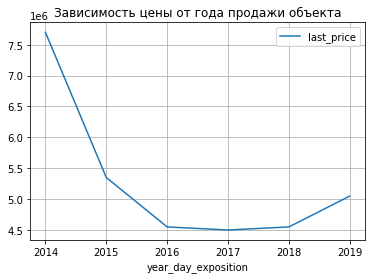

In [63]:
data.pivot_table(index='year_day_exposition', values='last_price', aggfunc='median').plot(grid = True, title = 'Зависимость цены от года продажи объекта')

<AxesSubplot:title={'center':'Зависимость цены от года продажи объекта'}, xlabel='year_day_exposition'>

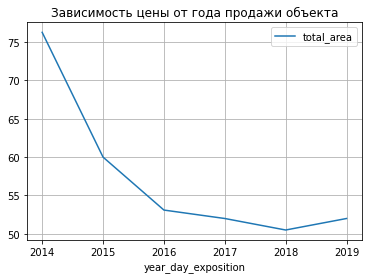

In [64]:
data.pivot_table(index='year_day_exposition', values='total_area', aggfunc='median').plot(grid = True, title = 'Зависимость цены от года продажи объекта')


<div class="alert alert-info"> Наблюдается снижение цены с 2014 года до 2016, хотя в это же время наблюдается и снижение площадей продаваемых квартир. Так как с уменьшением площади цена уменьшается, графики выглядят правдоподобно. Рост цен на недвижимость наблюдается в начале года, максимум в марте, затем падение и далее цена корректируется.Низкую цену летом и в новогодние праздники можно объяснить не желанием людей делать серьезные покупки в эти периоды (месяца отдыха). Во вторник покупаются самые дорогие квартиры, далее происходит спад в цене.
</div>

In [65]:
data_sort = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count','median'])
data_sort = data_sort.sort_values(by=data_sort.columns[0], ascending=False)

display(data_sort.head(10))

,count,median
,price_per_meter,price_per_meter
locality_name,,
Санкт-Петербург,15718,104761.904762
посёлок Мурино,556,85878.462169
посёлок Шушары,440,76876.172608
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
посёлок Парголово,327,91642.857143
Гатчина,307,67796.610169


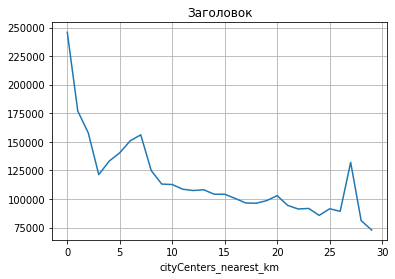

In [66]:
df_km = data_spb.groupby('cityCenters_nearest_km')['price_per_meter'].mean()
df_km.plot(grid = True, title = 'Заголовок')
plt.show()

С уменьшением расстояния до центра города цена объекта недвижимости увеличивается.

### Общий вывод

Изучили данные о компьютерных играх за несколько лет. Провели предобработку данных: заполнили/удалили пропущенные значения, устранили неявные дубликаты и аномальные значения, добавили в таблицу новый столбец с суммарными продажами по всем регионам, 
Выяснили, что больше всего стоимость объекта зависит от площади, расположения относительно центра города и аэропорта. С увеличением площади и уменьшением расстояния до центра города/аэропорта стоимость увеличивается. Также есть зависимость стоимости от этажа, на котором располагается объект. Самые дешевые объекты располагаются на 1 этаже.